In [27]:
#Kavya Bhojani
#DenseNet Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Model,Sequential, load_model
from tensorflow.python.keras.models import Input
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.applications import DenseNet121
from tensorflow.keras.models import Model

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.layers import Dropout

import tensorflow as tf
 
import argparse

import keras.preprocessing
#from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
# Importing the required libraries for modelling 
from keras import Input, Model
from keras.layers.core import Flatten, Dense,Dropout
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Model, model_from_json
from sklearn.metrics import classification_report, roc_auc_score

In [28]:
# Image Pre-processing 
traindir = "/content/drive/MyDrive/KavyaBhojani-Infowarehouse/Dataset-Plant disease/PlantDiseaseDefDS/PD-tv/train"
validdir = "/content/drive/MyDrive/KavyaBhojani-Infowarehouse/Dataset-Plant disease/PlantDiseaseDefDS/PD-tv/valid"
testdir = "/content/drive/MyDrive/KavyaBhojani-Infowarehouse/Dataset-Plant disease/PlantDiseaseDefDS/PD-tv/test/test"

# ImageDataGenerator - takes the inputs of the original data (train_datagen) and then transform it on a random basis, returning the 
#output resultant containing only the newly changed data(valid_datagen).

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 128
print("Training :")
training_set = train_datagen.flow_from_directory(traindir, target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
print("Testing :")
valid_set = valid_datagen.flow_from_directory(validdir, target_size=(224, 224), batch_size=batch_size, class_mode='categorical')

Training :
Found 8602 images belonging to 23 classes.
Testing :
Found 1829 images belonging to 23 classes.


In [29]:
class_dict = training_set.class_indices
print(class_dict)
li = list(class_dict.keys())
print(li)

{'bacterial_spot': 0, 'black_measeles': 1, 'black_rot': 2, 'cercospora_spotgray': 3, 'early_blight': 4, 'haunglongbird_citrus_greening': 5, 'healthy': 6, 'isariopsis_leaf_spot': 7, 'late_blight': 8, 'leaf_blight': 9, 'leaf_mold': 10, 'leaf_scorch': 11, 'mosaic_virus': 12, 'nitrogenDeficiency': 13, 'phosphorousDeficiency': 14, 'potassiumDeficiency': 15, 'powdery_mildew': 16, 'rust': 17, 'scab': 18, 'septorial_leaf_spot': 19, 'spider_mites': 20, 'target_spot': 21, 'yellow_leaf_curl_virus': 22}
['bacterial_spot', 'black_measeles', 'black_rot', 'cercospora_spotgray', 'early_blight', 'haunglongbird_citrus_greening', 'healthy', 'isariopsis_leaf_spot', 'late_blight', 'leaf_blight', 'leaf_mold', 'leaf_scorch', 'mosaic_virus', 'nitrogenDeficiency', 'phosphorousDeficiency', 'potassiumDeficiency', 'powdery_mildew', 'rust', 'scab', 'septorial_leaf_spot', 'spider_mites', 'target_spot', 'yellow_leaf_curl_virus']


In [30]:
train_num = training_set.samples
valid_num = valid_set.samples

DENSENET121 MODEL PREPARATION

In [31]:
base_model=DenseNet121(include_top=False,input_shape=(224,224,3))
base_model.trainable=False

In [32]:
#using softmax activation function for the output layer
#the range will be between 0 to 1, and the sum of all the probabilities will be equal to one
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(23,activation='softmax'))
classifier.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 flatten_7 (Flatten)         (None, 50176)             0         
                                                                 
 dense_7 (Dense)             (None, 23)                1154071   
                                                                 
Total params: 8,191,575
Trainable params: 1,154,071
Non-trainable params: 7,037,504
_________________________________________________________________


In [33]:
#Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models
#Combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle
#sparse gradients on noisy problems.
classifier.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
#fitting images to CNN
history = classifier.fit(training_set,
                         steps_per_epoch=train_num//batch_size,
                         validation_data=valid_set,
                         epochs=15,
                         validation_steps=valid_num//batch_size,
                         )

Epoch 1/15
67/67 [==============================] - 139s 2s/step - loss: 0.3711 - accuracy: 0.9272 - val_loss: 0.8015 - val_accuracy: 0.8962
Epoch 2/15
67/67 [==============================] - 136s 2s/step - loss: 0.3905 - accuracy: 0.9306 - val_loss: 0.9226 - val_accuracy: 0.8956
Epoch 3/15
67/67 [==============================] - 139s 2s/step - loss: 0.4152 - accuracy: 0.9270 - val_loss: 0.9755 - val_accuracy: 0.9012
Epoch 4/15
67/67 [==============================] - 138s 2s/step - loss: 0.3674 - accuracy: 0.9359 - val_loss: 0.7082 - val_accuracy: 0.9157
Epoch 5/15
67/67 [==============================] - 137s 2s/step - loss: 0.3825 - accuracy: 0.9345 - val_loss: 0.8590 - val_accuracy: 0.9090
Epoch 6/15
67/67 [==============================] - 139s 2s/step - loss: 0.3601 - accuracy: 0.9404 - val_loss: 0.9539 - val_accuracy: 0.9107
Epoch 7/15
67/67 [==============================] - 136s 2s/step - loss: 0.3521 - accuracy: 0.9438 - val_loss: 0.9269 - val_accuracy: 0.9196
Epoch 8/15
67

In [36]:
#Saving the model
filepath="detectionDefDN121.h5"
classifier.save(filepath)

PREDICTED DISEASE : 
1/1 [==============================] - 2s 2s/step


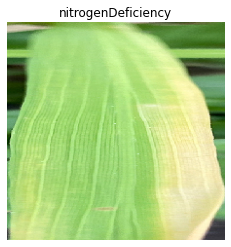

In [37]:
#PREDICTING AN IMAGE
#taking an image from the test directory to check whether our model is detecting the right disease
#from keras.preprocessing import image
import keras.utils as image
import numpy as np
#PotatoHealthy1.JPG
#CornCommonRust3.JPG
#PotatoEarlyBlight2.JPG
#AppleScab1.JPG
#TomatoYellowCurlVirus1.JPG
image_path = "/content/drive/MyDrive/KavyaBhojani-Infowarehouse/Dataset-Plant disease/PlantDiseaseDefDS/test/test/nitrogenDeficiency.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255



print("PREDICTED DISEASE : ")
prediction = classifier.predict(img)
#decoding the results into a list of tuples (class, description, probability)
#one list per each sample in the batch
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

#plotting image with predicted class name i.e the name of the disease        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

PREDICTED DISEASE : 
1/1 [==============================] - 0s 26ms/step


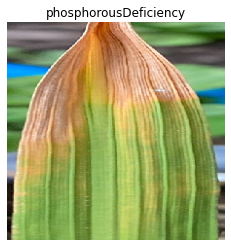

In [38]:
#PREDICTING AN IMAGE
#taking an image from the test directory to check whether our model is detecting the right disease
#from keras.preprocessing import image
import keras.utils as image
import numpy as np
#PotatoHealthy1.JPG
#CornCommonRust3.JPG
#PotatoEarlyBlight2.JPG
#AppleScab1.JPG
#TomatoYellowCurlVirus1.JPG
image_path = "/content/drive/MyDrive/KavyaBhojani-Infowarehouse/Dataset-Plant disease/PlantDiseaseDefDS/test/test/phosporousDeficiency.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255



print("PREDICTED DISEASE : ")
prediction = classifier.predict(img)
#decoding the results into a list of tuples (class, description, probability)
#one list per each sample in the batch
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

#plotting image with predicted class name i.e the name of the disease        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

PREDICTED DISEASE : 
1/1 [==============================] - 0s 26ms/step


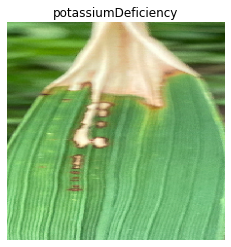

In [39]:
#PREDICTING AN IMAGE
#taking an image from the test directory to check whether our model is detecting the right disease
#from keras.preprocessing import image
import keras.utils as image
import numpy as np
#PotatoHealthy1.JPG
#CornCommonRust3.JPG
#PotatoEarlyBlight2.JPG
#AppleScab1.JPG
#TomatoYellowCurlVirus1.JPG
image_path = "/content/drive/MyDrive/KavyaBhojani-Infowarehouse/Dataset-Plant disease/PlantDiseaseDefDS/test/test/potassiumDeficiency.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255



print("PREDICTED DISEASE : ")
prediction = classifier.predict(img)
#decoding the results into a list of tuples (class, description, probability)
#one list per each sample in the batch
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

#plotting image with predicted class name i.e the name of the disease        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()